In [33]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
#import pyplot.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [26]:
real = pd.read_csv('real.csv', index_col=0)
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.942,121.504,15.4
411,2012.667,5.6,90.456,9,24.974,121.543,50.0
412,2013.250,18.8,390.970,7,24.979,121.540,40.6


In [7]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       414 non-null    float64
 1   house_age  414 non-null    float64
 2   dist_mrt   414 non-null    float64
 3   no_cvs     414 non-null    int64  
 4   lat        414 non-null    float64
 5   long       414 non-null    float64
 6   price      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [27]:
real.sort_values(by=['price'], inplace=True) 
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
114,2013.333,14.8,393.261,6,24.962,121.538,7.6
348,2013.583,17.4,6488.021,1,24.957,121.474,11.2
163,2012.750,16.0,4066.587,0,24.943,121.503,11.6
117,2013.000,30.9,6396.283,1,24.944,121.479,12.2
331,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
106,2012.833,0.0,292.998,6,24.977,121.545,71.0
167,2013.417,0.0,292.998,6,24.977,121.545,73.6
313,2013.583,35.4,318.529,9,24.971,121.541,78.0


In [28]:
#inplace=True 원본 데이터 대신 변경사항 저장 
real.reset_index(inplace=True) 
real

,No,date,house_age,dist_mrt,no_cvs,lat,long,price
0,114,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,348,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,163,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,117,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,331,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...,...
409,106,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,167,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,313,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,221,2013.333,37.2,186.510,9,24.977,121.543,78.3


In [29]:
real=real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


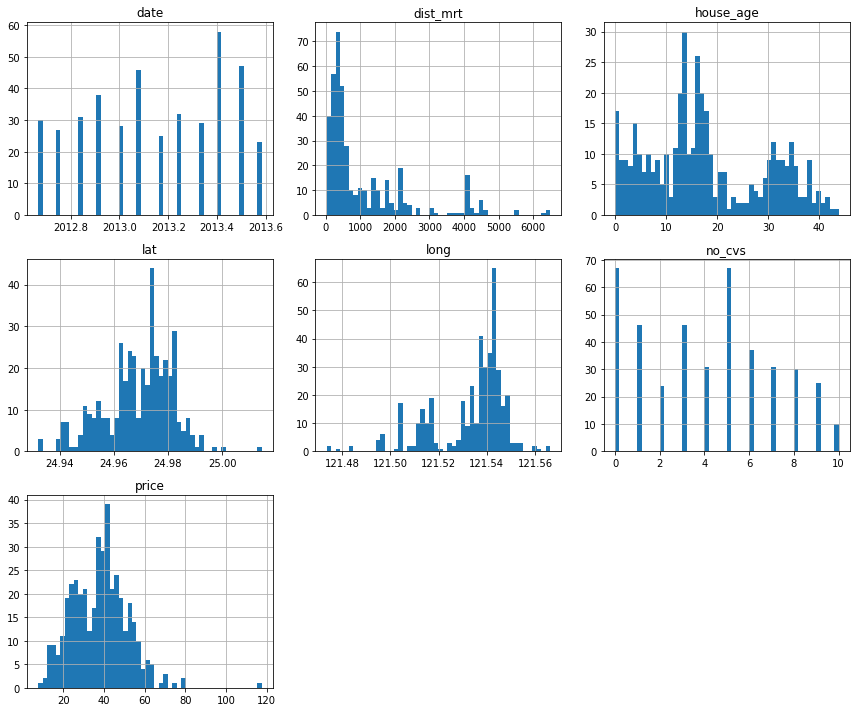

In [31]:
real.describe()
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

In [32]:
np.percentile(real.price, 99.5)
real=real[real.price<90]

77.71400000000001

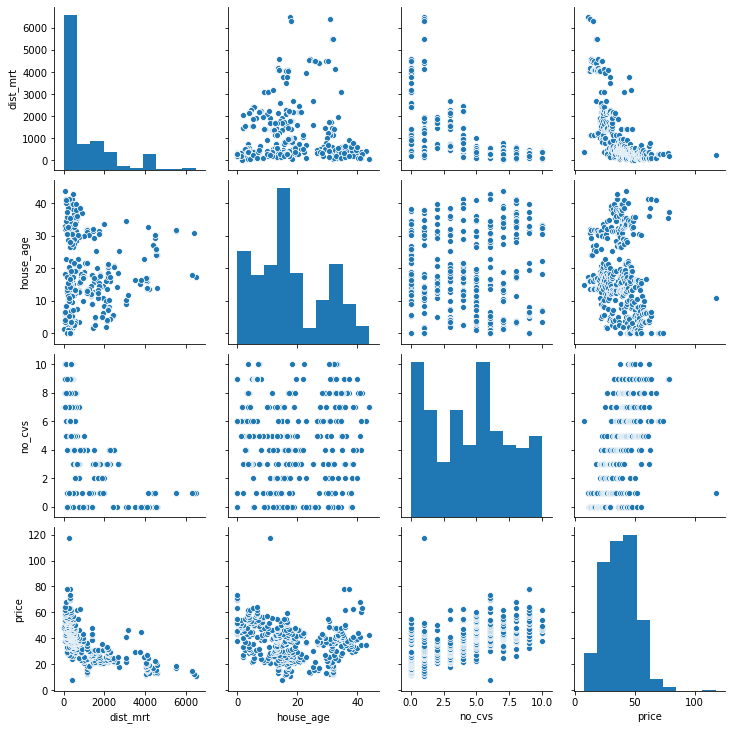

In [35]:
sns.pairplot(real[['dist_mrt','house_age','no_cvs','price']])

In [38]:
real2 = real.copy()
real2['dist_mrt']=np.log(1+real.dist_mrt) # to prevent inf
real2

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,5.977,6,24.962,121.538,7.6
1,2013.583,17.4,8.778,1,24.957,121.474,11.2
2,2012.750,16.0,8.311,0,24.943,121.503,11.6
3,2013.000,30.9,8.764,1,24.944,121.479,12.2
4,2013.083,32.0,7.054,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,5.684,6,24.977,121.545,71.0
410,2013.417,0.0,5.684,6,24.977,121.545,73.6
411,2013.583,35.4,5.767,9,24.971,121.541,78.0
412,2013.333,37.2,5.234,9,24.977,121.543,78.3


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error


data=real2[['dist_mrt','house_age','price']]

In [149]:
# Test-Train Split
n = data.shape[0] #data 행 개수

test=np.random.choice(np.arange(n), int(n*0.2), replace=False)

train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

x_train = train_df[['dist_mrt','house_age']]
y_train=train_df[['price']]
x_test=test_df[['dist_mrt','house_age']]
y_test=train_df[['price']]


x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

(332, 3) (82, 3)


In [150]:
#Feature Extraction
import plotly.express as px  #pip install plotly
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(x_train)
#scaler--> method 2가지 fit, transform
#fit : 데이터 변환 학습 only for train dataset
#transform :  실제 데이터의 스케일 조정 
#단축 method fit_transform()


In [151]:
def scl_train(sclr, df):
    colnames=df.columns
    df=sclr.transform(df)
    df=pd.DataFrame(df)
    df.set_axis(colnames, axis=1, inplace=True)
    return df 

In [152]:
x_train_sc = scl_train(scaler, x_train)
x_test_sc = scl_train(scaler, x_test)

In [169]:
poly = PolynomialFeatures(degree=2)
Phi_train=poly.fit_transform(x_train_sc)
Phi_test =poly.fit_transform(x_test_sc)
print(Phi_train.shape)
print(Phi_test.shape)


(332, 6)
(82, 6)


In [164]:
# Ridge
from sklearn.linear_model import Ridge
alphas=np.logspace(-6,6,500)

def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    # ridge 함수를 객체로 불러오기 
    reg=Ridge()
    
    coefs=[]
    train_MSE=[]
    test_MSE=[]
    
    for a in alphas:
        #regularization coefficient 'lambda' 
        reg.set_params(alpha=a)
        
        reg.fit(Phi_train, Y_train)
        
        coefs.append(reg.coef_)
        
        train_pred=reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
        
        test_pred=reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
        

    print(np.array(coefs).shape)
        
        

In [165]:
Ridge_output = Ridge_Reg(Phi_train, y_train, Phi_test, y_test, alphas, fig=True)

ValueError: Found input variables with inconsistent numbers of samples: [332, 82]